# Create a co-stardom network

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

First we should insert a query and get the results from the third search engine

In [ ]:
get_query()

In [ ]:
result = search_engine3(query,q) 

Now we need to finde nodes and edges. Nodes of this network, are all star actors in the documents that we found in the previous step, and edges are any duel combination of these actors that exist in at least 2 documents.

In [ ]:
stars = [] #set of star actors in 10 first result of search engine
for x , y in result :
    with open(path+"article_" + str(y) + ".tsv", encoding = "utf-8") as fd:
        rd = csv.reader(fd, delimiter="\t", quotechar='"')
        for row in rd:
                if row :
                    tsv = row
        for i in tsv[6] : #stars of a movie
            if i not in stars :
                stars.append(i) 

    

Now we have nodes of our network. In order to create edges, first we shoud make a list of all possible duel combination 

In [ ]:
duel_stars = []
for i in range(0 , len(stars)) :
    for j in range(i+1,len(stars)) :
        duel_stars.append(list((stars[i],stars[j]))) #make a nested list with all possible duel combination 


In this step we should check which duel combinations that we created in previous step, exist in more than 2 documents

In [ ]:
edge = []
counter = 0
for i in s : #for each dual combination
    for j in range(len(df.index)): # search in the whole dataset
        with open(path2+'article_' + docId + '.tsv', encoding = 'utf8') as fd:
            rd = csv.reader(fd, delimiter="\t", quotechar='"')
            for row in rd:
                if row :
                    tsv = row
        stars = tsv[6].split(",")
        if(all(elem in stars  for elem in i )) : #if both elements of the combination was in the document
            counter = counter + 1
            if (counter == 2 ): # we want them to be together in at least 2 movies 
                edge.append(tuple(i))
                break

Now we have Nodes and Edges. It's time to create a network

# Creating co-stardom network

In [35]:
stars = ['a','b','c','d','e']
edge = [('a','b'),('b','c'), ('d','e'), ('c', 'e'), ('c', 'd')]

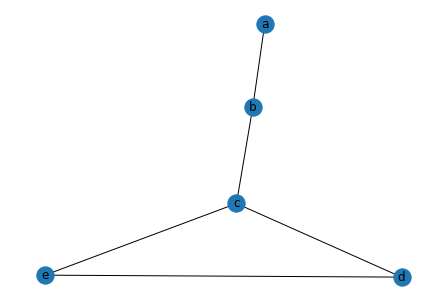

<Figure size 720x720 with 0 Axes>

In [64]:
G = nx.Graph()
G.add_nodes_from(stars)
G.add_edges_from(edge)
nx.draw(G, with_labels = 1)
plt.figure(figsize=(10,10))
plt.savefig("co-stardom.png")
plt.show()


To make a better visualization, we position nodes on a circular layout

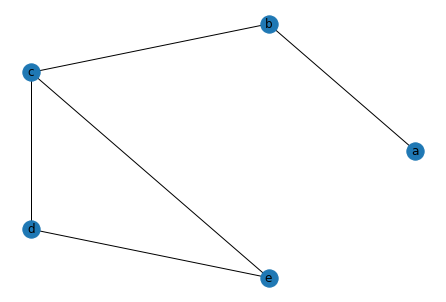

<Figure size 720x720 with 0 Axes>

In [65]:
G = nx.Graph()
G.add_nodes_from(stars)
G.add_edges_from(edge)
nx.draw(G,pos = nx.circular_layout(G), with_labels = 1)
plt.figure(figsize=(10,10))
plt.savefig("co-stardom.png")
plt.show()


# Analysis

Let's do some analysis on this network. We can make a density distribution histogram which shows the number of connections for each node

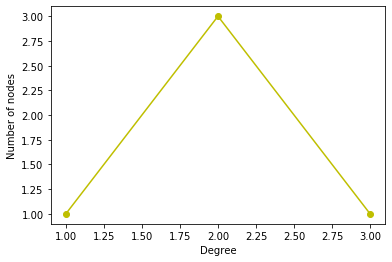

In [72]:
all_degrees =[val for (node, val) in G.degree()]
unique_degrees = list(set(all_degrees))
count = []
for i in unique_degrees :
    x = all_degrees.count(i)
    count.append(x)
plt.plot(unique_degrees , count, "yo-")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()

We can calculate degree centality for each node to see which actors where more involved with other actors(most influential)

In [54]:
nx.degree_centrality(G)

{'a': 0.25, 'b': 0.5, 'c': 0.75, 'd': 0.5, 'e': 0.5}

In [61]:
sorted(nx.degree_centrality(G), key = nx.degree_centrality(G).get , reverse = True)

['c', 'b', 'd', 'e', 'a']